In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)

In [3]:
dados.head(3)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [4]:
linhas = dados.shape[0]
colunas= dados.shape[1]
duplicados = (dados.duplicated()).sum()
nulos = (dados.isnull()).sum()

In [5]:
print('A base de dados tem {} Linhas e {} Colunas.'.format(linhas, colunas))
print('A base de dados tem {} dados duplicados'.format(duplicados))
print('Dados nulos:\n\n{}'.format(nulos))

A base de dados tem 1000 Linhas e 21 Colunas.
A base de dados tem 0 dados duplicados
Dados nulos:

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64


## Incluindo dados numericos nas colunas tipo str

In [6]:
 dados.select_dtypes(exclude='number')

,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,sexo_est_civil,outros_fiadores,propriedade,outros_planos_financiamento,tipo_residencia,status_emprego,telefone,trabalhador_estrangeiro
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,female : divorced/separated/married,none,real estate,none,own,unskilled - resident,none,yes
996,< 0 DM,existing credits paid back duly till now,car (used),... < 100 DM,1 <= ... < 4 years,male : divorced/separated,none,if not A121 : building society savings agreeme...,none,own,management/ self-employed/ highly qualified em...,"yes, registered under the customers name",yes
997,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,.. >= 7 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,own,skilled employee / official,none,yes
998,< 0 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,"yes, registered under the customers name",yes


In [7]:
corrigir = dados.select_dtypes(exclude='number')
a = {}

for col in corrigir:
    i = 1
    for item in corrigir[col].unique():
        a.update({item: i})
        i += 1
    corrigir[col] =corrigir[col].map(a)
    dados[col] = corrigir[col]   

In [8]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,1


## Separando dados em variáveis dependente e independentes:

In [9]:
y = dados.default
x = dados.drop(columns='default')

In [10]:
x.head(3)

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1
1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1
2,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1


In [11]:
y.head(3)

0    0
1    1
2    0
Name: default, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.30, random_state=SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de teste de treino tem {} elementos e a base de teste tem {} elementos.'.format(base_treino,
                                                                                              base_teste))

A base de teste de treino tem 700 elementos e a base de teste tem 300 elementos.


## Criando e rodando modelo:

In [13]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=1000)

In [14]:
  modelo.fit(treino_x, treino_y)

LogisticRegression(max_iter=1000)

## Acuracia de treino

In [17]:
print(modelo.score(treino_x, treino_y))

0.7585714285714286


In [19]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

## Acuracia de teste

In [20]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(teste_y, previsoes)
acuracia

## Matriz de confusão

<img src='data/matriz_confusao.jpg' width="300" height="300">

/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


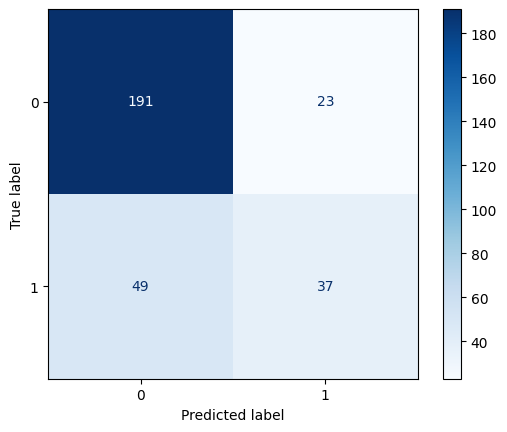

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix 

matriz_confusao = plot_confusion_matrix (modelo, teste_x, teste_y, cmap ='Blues', values_format='.3g')
matriz_confusao

In [34]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       214
           1       0.62      0.43      0.51        86

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.74      0.76      0.75       300



 ## Plotando a curva ROC

roc_auc 0.7597261464898936


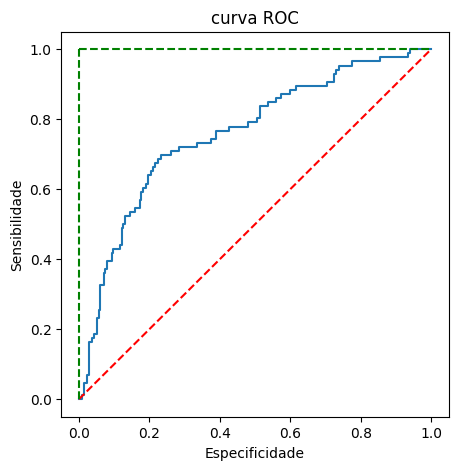

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa de falsos positivos
#tvp = taxa de falsos negativos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize = (5,5))
plt.title('curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()